In [1]:
import sys; sys.path.append('/rds/general/user/cb2714/home/wwa/'); from wwa import *

In [115]:
gcm_list = sorted(list(set(["_rcp85_".join(fnm.split("_")[3:5])[:-4] for fnm in fl])))
gcm_fl = [glob.glob("/rds/general/user/cb2714/home/00_WWA_project_folder/live/data/cmip5_gmsts/*"+gcm+".dat")[0] for gcm in gcm_list]

In [117]:
cmip5_gmst = merge_byindex([pd.read_table(fnm, comment = "#", sep = " ", header = None, names = ["year", fnm.split("_")[-3]+"_"+fnm[-6:-4]], index_col = "year")
                            for fnm in gcm_fl])
cmip5_since1900s = cmip5_gmst - cmip5_gmst.loc[slice(None, "1900")].mean(axis = 0)

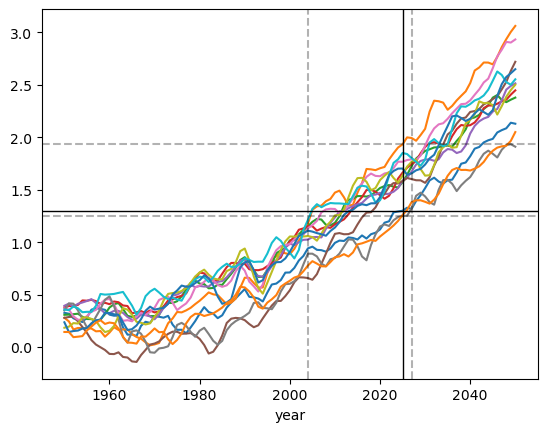

In [219]:
cmip5_since1900s.loc[slice("1950","2050")].plot(legend = None)

# range of times when 1.3 was crossed
plt.axhline(1.3, color = "k", lw = 1, ls = "-")
[plt.axvline(x, color = "k", alpha = 0.3, ls = "--") for x in [2004,2027]]

# range of temps reached in 2025
plt.axvline(2025, color = "k", lw = 1, ls = "-")
[plt.axhline(y, color = "k", alpha = 0.3, ls = "--") for y in [cmip5_since1900s.loc[2025].min(), cmip5_since1900s.loc[2025].max()]]

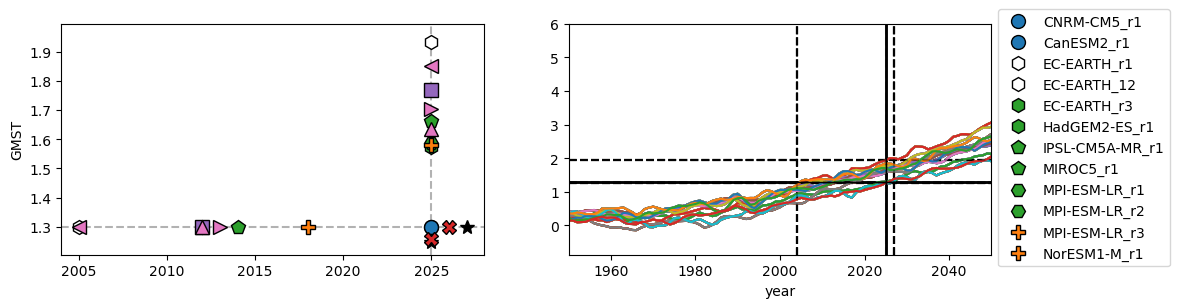

In [240]:
gcm_markers = {'CanESM2_r1'      : 'h',
               'CNRM-CM5_r1'     : 'o',
               'EC-EARTH_12'    : 'p',
               'EC-EARTH_r1'     : 'h',
               'EC-EARTH_r3'     : 'H',
               'IPSL-CM5A-MR_r1' : "s",
               'HadGEM2-ES_r1'   : 'P',
               'MIROC5_r1'       : '*',
               'MPI-ESM-LR_r1'   : '^',
               'MPI-ESM-LR_r2'   : '<',
               'MPI-ESM-LR_r3'   : '>',
               'NorESM1-M_r1'    : 'X'}

gcm_colours = {'CanESM2_r1'      : 'w',
               'CNRM-CM5_r1'     : 'tab:blue',
               'EC-EARTH_12'     : 'tab:green',
               'EC-EARTH_r1'     : 'tab:green',
               'EC-EARTH_r3'     : 'tab:green',
               'IPSL-CM5A-MR_r1' : "tab:purple",
               'HadGEM2-ES_r1'   : 'tab:orange',
               'MIROC5_r1'       : 'k',
               'MPI-ESM-LR_r1'   : 'tab:pink',
               'MPI-ESM-LR_r2'   : 'tab:pink',
               'MPI-ESM-LR_r3'   : 'tab:pink',
               'NorESM1-M_r1'    : 'tab:red'}

nc = 2
fig, axs = plt.subplots(ncols = nc, figsize = (nc*6,3), dpi = 100)

for c in cmip5_since1900s.columns:
   
    df_c = cmip5_since1900s[[c]].dropna(axis = 0, how = "any")
    
    #     cmip5_since1900s[[c]].plot(ax = axs[0], color = gcm_colours[c], ls = "--", legend = None)
    df_c.loc[[2025]].plot(ax = axs[0], marker = gcm_markers[c], color = gcm_colours[c], mec = "k", ls = "", legend = None, ms = 10, zorder = 99)
    axs[0].plot(np.abs(cmip5_since1900s[[c]] - 1.3).idxmin(), 1.3,
                marker = gcm_markers[c], mec = "k", color = gcm_colours[c], ls = "", ms = 10, zorder = 99, label = "_")

fig.legend(list(cmip5_since1900s.columns), loc = "center left", bbox_to_anchor = (0.9,0.5))


for c in cmip5_since1900s.columns:
    
    cmip5_since1900s.plot(ax = axs[1], legend = None, label = "_")

    # range of times when 1.3 was crossed
    axs[1].axhline(1.3, color = "k", lw = 1, ls = "-")
    [axs[1].axvline(x, color = "k", alpha = 0.3, ls = "--") for x in [2004,2027]]

    # range of temps reached in 2025
    axs[1].axvline(2025, color = "k", lw = 1, ls = "-")
    [axs[1].axhline(y, color = "k", alpha = 0.3, ls = "--") for y in [cmip5_since1900s.loc[2025].min(), cmip5_since1900s.loc[2025].max()]]
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
#     axs[1].plot(df_c.index, lowess(df_c[c], df_c.index.values)[:,1], color = gcm_colours[c], alpha = 0.5)
    
axs[0].set_xlabel("")
axs[0].set_ylabel("GMST")

axs[0].set_xlim(2004,2028)
axs[0].set_ylim(1.205, 1.995)

axs[0].axhline(1.3, color = "k", alpha = 0.3, ls = "--")
axs[0].axvline(2025, color = "k", alpha = 0.3, ls = "--")

axs[1].set_xlim(1950,2050)
axs[1].set_ylim(None, 6)
axs[1].axhline(1.3, color = "k", alpha = 0.3, ls = "--")
axs[1].axvline(2025, color = "k", alpha = 0.3, ls = "--")

